## Ploting a base station sector on map using python and plotly

In [1]:
# importing the required libraries
import numpy as np
from numpy import pi, sin, cos
import plotly.graph_objs as go
import math

In [2]:
# add your private mapbox access token here
#mapbox_access_token = ''

In [3]:
# this function converts degree to raddian
def degree2rad(degrees):
    return degrees * pi / 180

# this function prepares sector polygon given input arguments
def sec_poly(long, lat, bearing, radius=0.5, hbw=60):
    R = 6378.1  # Radius of the Earth
    rad_bearing = degree2rad(bearing)

    site_lat = math.radians(lat)  # site lat point converted to radians
    site_lon = math.radians(long)  # site long point converted to radians

    coords = []
    # increase the value of n if you seek a more smooth sector polygon e.g. n = 5 or more
    n = 3
    t = np.linspace(degree2rad(bearing - (hbw / 2)), degree2rad(bearing + (hbw / 2)), n)
    for brg in t:
        bor_lat = math.asin(math.sin(site_lat) * math.cos(radius / R) + math.cos(site_lat) * math.sin(radius / R) * math.cos(brg))
        bor_lon = site_lon + math.atan2(math.sin(brg) * math.sin(radius / R) * math.cos(site_lat),
                                    math.cos(radius / R) - math.sin(site_lat) * math.sin(bor_lat))

        bor_lat = math.degrees(bor_lat)
        bor_lon = math.degrees(bor_lon)

        coords.append([bor_lon, bor_lat])

    coords.insert(0, [long, lat])
    coords.append([long, lat])

    return (coords)

In [4]:
# sample inputs to run sec_poly function 
lat = 35.699848
long = 51.338993
bearing = 60
radius = 0.5
hbw = 40
poly_sec_list = sec_poly(long, lat, bearing, radius, hbw)

In [5]:
poly_sec_list

[[51.338993, 35.699848],
 [51.34254837997486, 35.703288714844156],
 [51.343783078687146, 35.70209370635286],
 [51.344439976361635, 35.70062783588948],
 [51.338993, 35.699848]]

In [6]:
fig = go.Figure(go.Scattermapbox(
                    lat=[lat],
                    lon=[long],
                    mode='markers',
                    text='For Freedon',
                    marker_size=9, marker_color='red',
                    hoverinfo='text'))

In [8]:
fig.update_layout(
    title_text='Your title',
    margin = {'l':0, 'r':0, 'b':0, 't':0},
    mapbox=dict(
        #accesstoken=mapbox_access_token,
        layers=
        [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "MultiPolygon",
                        'coordinates': [[ poly_sec_list ]]
                    }
                }]
            },
            'type': "fill", 'below': "traces", 'color': "red", 'opacity': 0.3}],
        
        bearing=0,
        center={ 'lon': long, 'lat': lat},        
        pitch=0,
        zoom=15,
        # open-street-map does not require access token
        style='open-street-map')
   )

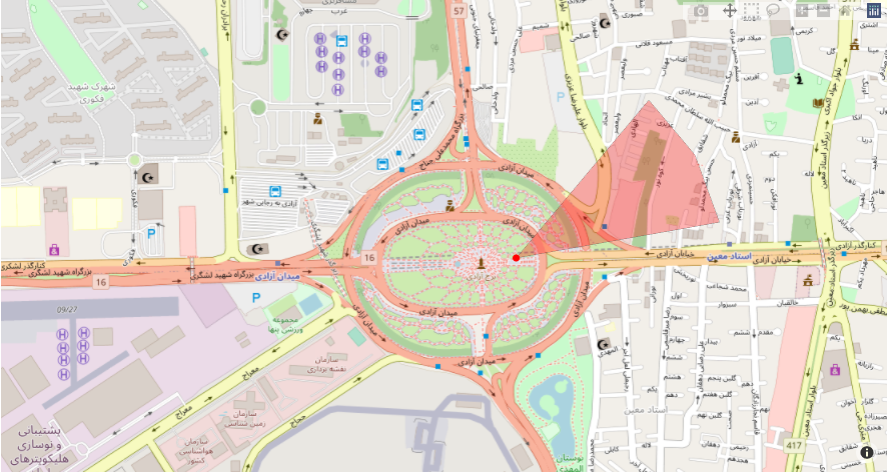